In [1]:
import pandas as pd

In [73]:
sample_data = {
    "day": ["2/3/2018", "4/5/2018", "6/7/2019", "8/9/2019", "10/11/2020", "12/13/2020", "1/2/2021", "1/3/2021"],
    "price": [10, 12, 20, 34, 32, 40, 34, 42],
    "vol": [12, 12, 25, 40, 56, 12, 68, 40],
    "color": ["red", "yellow", "green", "blue", "orange", "magenta", "cyan", "violet"],
}
df = pd.DataFrame(sample_data)

In [74]:
# Or: df[:], df.head()
df

,day,price,vol,color
0,2/3/2018,10,12,red
1,4/5/2018,12,12,yellow
2,6/7/2019,20,25,green
3,8/9/2019,34,40,blue
4,10/11/2020,32,56,orange
5,12/13/2020,40,12,magenta
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [75]:
df.tail()

,day,price,vol,color
3,8/9/2019,34,40,blue
4,10/11/2020,32,56,orange
5,12/13/2020,40,12,magenta
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [76]:
# Shape
df.shape

(8, 4)

In [77]:
# Number of rows
len(df)

8

In [78]:
df.dtypes

day      object
price     int64
vol       int64
color    object
dtype: object

## Access

In [79]:
# Access a column
df.vol

0    12
1    12
2    25
3    40
4    56
5    12
6    68
7    40
Name: vol, dtype: int64

In [80]:
# Also
df['price']

0    10
1    12
2    20
3    34
4    32
5    40
6    34
7    42
Name: price, dtype: int64

In [81]:
# Access a row
df[2:3]

,day,price,vol,color
2,6/7/2019,20,25,green


In [114]:
# Also
df.iloc[2:3]

,day,price,vol,color
2,6/7/2019,20,25,green


In [121]:
# Access a cell by row, col index with .iat
df.iat[3, 1]

34

In [120]:
# Access a cell by row index and column name with .at
df.at[5, 'color']

'magenta'

In [113]:
df.loc[df['vol'] > 30]

,day,price,vol,color
3,8/9/2019,34,40,blue
4,10/11/2020,32,56,orange
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [115]:
df[df.vol > 30]

,day,price,vol,color
3,8/9/2019,34,40,blue
4,10/11/2020,32,56,orange
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [152]:
# Show columns from a list
df[["day", "color"]]

,day,color
0,2/3/2018,red
1,4/5/2018,yellow
2,6/7/2019,green
3,8/9/2019,blue
4,10/11/2020,orange
5,12/13/2020,magenta
6,1/2/2021,cyan
7,1/3/2021,violet


In [116]:
# Vector-style operations on a column
[2 * df.vol]

[0     24
 1     24
 2     50
 3     80
 4    112
 5     24
 6    136
 7     80
 Name: vol, dtype: int64]

In [104]:
# Query
df.query('vol > 30 and price > 32')

,day,price,vol,color
3,8/9/2019,34,40,blue
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [108]:
# Select a random row
df.sample()

,day,price,vol,color
2,6/7/2019,20,25,green


In [111]:
# Select n random rows
df.sample(n=2)

,day,price,vol,color
5,12/13/2020,40,12,magenta
4,10/11/2020,32,56,orange


In [155]:
pd.melt(df)

,variable,value
0,day,2/3/2018
1,day,4/5/2018
2,day,6/7/2019
3,day,8/9/2019
4,day,10/11/2020
5,day,12/13/2020
6,day,1/2/2021
7,day,1/3/2021
8,price,10
9,price,12


## Summarization

In [83]:
df.describe()

,price,vol
count,8.00000,8.00000
mean,28.00000,33.12500
std,12.37509,21.51038
min,10.00000,12.00000
25%,18.00000,12.00000
50%,33.00000,32.50000
75%,35.50000,44.00000
max,42.00000,68.00000


In [84]:
# Max of a column
max(df.price)

42

In [131]:
# Or:
df.price.max()

42

In [132]:
# Mean of a column
df.vol.mean()

33.125

In [85]:
sum(df.vol)

265

In [86]:
# Calculate a running sum with .expanding
df.vol.expanding(1).sum()

0     12.0
1     24.0
2     49.0
3     89.0
4    145.0
5    157.0
6    225.0
7    265.0
Name: vol, dtype: float64

In [87]:
# Count a column by unique values
df.vol.value_counts()

12    3
40    2
25    1
56    1
68    1
Name: vol, dtype: int64

In [88]:
# Enforce boundary values with .clip
df.vol.clip(lower=15, upper=55)

0    15
1    15
2    25
3    40
4    55
5    15
6    55
7    40
Name: vol, dtype: int64

In [89]:
import random

df2 = pd.DataFrame({
    "state": ["CA", "CA", "NY", "WA", "CO", "FL", "CO", "NY", "CA", "NY", "IL", "WA", "IL", "NY", "MA", "MS", "TX", "CA", "WA", "CO"],
    "val": [random.randint(0, 100) for _ in range(20)]
})
df2.head()

,state,val
0,CA,62
1,CA,2
2,NY,49
3,WA,38
4,CO,81


In [96]:
# Count values by a column with .groupby
# Sort by a different column with .sort_values
df2.groupby(by="state").count().sort_values('val', ascending=False)

,val
state,
CA,4
NY,4
CO,3
WA,3
IL,2
FL,1
MA,1
MS,1
TX,1


In [122]:
# The number of unique values in a column
df2['state'].nunique()

9

In [127]:
# Cumulative sum of a column
df2.val.cumsum()

0      62
1      64
2     113
3     151
4     232
5     279
6     284
7     326
8     374
9     438
10    447
11    448
12    528
13    586
14    676
15    694
16    711
17    776
18    858
19    861
Name: val, dtype: int64

In [128]:
# Cumulative max of a column
df2.val.cummax()

0     62
1     62
2     62
3     62
4     81
5     81
6     81
7     81
8     81
9     81
10    81
11    81
12    81
13    81
14    90
15    90
16    90
17    90
18    90
19    90
Name: val, dtype: int64

In [146]:
# Cumulative product of a column
df2.val.cumprod()

0                      62
1                     124
2                    6076
3                  230888
4                18701928
5               878990616
6              4394953080
7            184588029360
8           8860225409280
9         567054426193920
10       5103489835745280
11       5103489835745280
12     408279186859622400
13    5233448764148547584
14   -8604957143079059456
15   -7315275985746657280
16    4767516758273687552
17   -3706059965272686592
18   -8749011973007474688
19   -7800291845312872448
Name: val, dtype: int64

In [148]:
df3 = pd.DataFrame({
    "state": ["WA", "MI", "WA", "AK", "FL", "IL", "CA", "RI", "MI", "IL", "TX", "OR", "AL", "TX", "MS", "MA", "OK", "WA", "WA", "CO"],
    "val": [random.randint(0, 100) for _ in range(20)]
})
df3.head()

,state,val
0,WA,48
1,MI,44
2,WA,4
3,AK,25
4,FL,74


In [151]:
# Intersection - values of state in df2 that are also in df3 - .isin
df2[df2.state.isin(df3.state)].state

0     CA
1     CA
3     WA
4     CO
5     FL
6     CO
8     CA
10    IL
11    WA
12    IL
14    MA
15    MS
16    TX
17    CA
18    WA
19    CO
Name: state, dtype: object

## Modification

In [59]:
# Add a column that is the result of an operation performed on zero or more other columns.
df = df.assign(sales=df.price * df.vol)
df

,day,price,vol,color,sales
0,2/3/2018,10,12,red,120
1,4/5/2018,12,12,yellow,144
2,6/7/2019,20,25,green,500
3,8/9/2019,34,40,blue,1360
4,10/11/2020,32,56,orange,1792
5,12/13/2020,40,12,magenta,480
6,1/2/2021,34,68,cyan,2312
7,1/3/2021,42,40,violet,1680


In [42]:
def lighten(color):
    return f"light {color}"

# This doesn't work as expected since df.color is a series
print(f"type(df.color) = {type(df.color)}")
df.assign(light_color=lighten(df.color))

type(df.color) = <class 'pandas.core.series.Series'>


,day,price,vol,color,sales,light_color
0,2/3/2018,10,12,red,120,light 0 red\n1 yellow\n2 green...
1,4/5/2018,12,12,yellow,144,light 0 red\n1 yellow\n2 green...
2,6/7/2019,20,25,green,500,light 0 red\n1 yellow\n2 green...
3,8/9/2019,34,40,blue,1360,light 0 red\n1 yellow\n2 green...
4,10/11/2020,32,56,orange,1792,light 0 red\n1 yellow\n2 green...
5,12/13/2020,40,12,magenta,480,light 0 red\n1 yellow\n2 green...
6,1/2/2021,34,68,cyan,2312,light 0 red\n1 yellow\n2 green...
7,1/3/2021,42,40,violet,1680,light 0 red\n1 yellow\n2 green...


In [43]:
# Use .apply to apply the function to each item in the column series.
df.assign(light_color=df.color.apply(lighten))

,day,price,vol,color,sales,light_color
0,2/3/2018,10,12,red,120,light red
1,4/5/2018,12,12,yellow,144,light yellow
2,6/7/2019,20,25,green,500,light green
3,8/9/2019,34,40,blue,1360,light blue
4,10/11/2020,32,56,orange,1792,light orange
5,12/13/2020,40,12,magenta,480,light magenta
6,1/2/2021,34,68,cyan,2312,light cyan
7,1/3/2021,42,40,violet,1680,light violet


In [100]:
# Rename one or more columns
# Similar to assign, the dataframe is not modified. The return value must be captured to do the modification.
df = df.rename(columns = {"vol": "volume"})
df = df.rename(columns = {"volume": "vol"})

In [101]:
df

,day,price,vol,color
0,2/3/2018,10,12,red
1,4/5/2018,12,12,yellow
2,6/7/2019,20,25,green
3,8/9/2019,34,40,blue
4,10/11/2020,32,56,orange
5,12/13/2020,40,12,magenta
6,1/2/2021,34,68,cyan
7,1/3/2021,42,40,violet


In [139]:
# Shift values with .shift
df.price, df.price.shift(2)

(0    10
 1    12
 2    20
 3    34
 4    32
 5    40
 6    34
 7    42
 Name: price, dtype: int64,
 0     NaN
 1     NaN
 2    10.0
 3    12.0
 4    20.0
 5    34.0
 6    32.0
 7    40.0
 Name: price, dtype: float64)

In [156]:
# Show the index
df.index

RangeIndex(start=0, stop=8, step=1)

In [157]:
# Set the index to the provided column
df.set_index("day")

,price,vol,color
day,,,
2/3/2018,10,12,red
4/5/2018,12,12,yellow
6/7/2019,20,25,green
8/9/2019,34,40,blue
10/11/2020,32,56,orange
12/13/2020,40,12,magenta
1/2/2021,34,68,cyan
1/3/2021,42,40,violet


## Plotting

<AxesSubplot: xlabel='state', ylabel='val'>

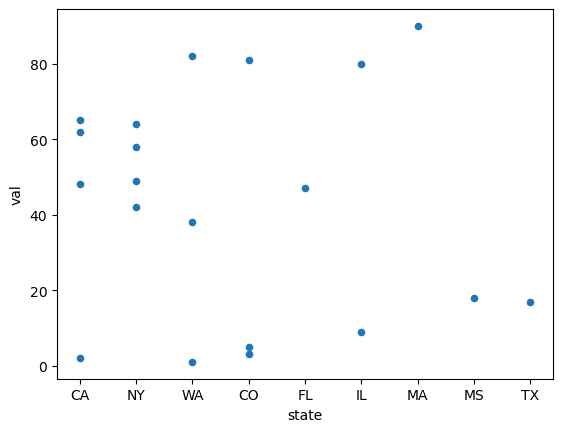

In [142]:
# Scatter plot
df2.plot.scatter(x='state', y='val')

<AxesSubplot: ylabel='Frequency'>

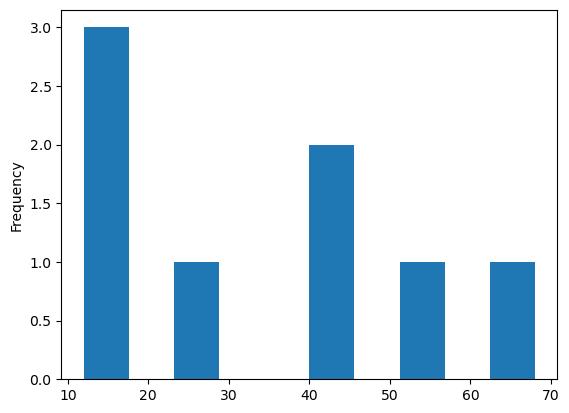

In [144]:
# Histogram
df.vol.plot.hist()